In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ECommerce_Shipping_Data.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [24]:
flight = df[df['Mode_of_Shipment'] == 'Flight'].groupby(['Mode_of_Shipment', 'Gender']).agg({'Reached.on.Time_Y.N' : 'sum'}).reset_index()
flight['AllTime'] = flight['Reached.on.Time_Y.N'].sum()
ship = df[df['Mode_of_Shipment'] == 'Ship'].groupby(['Mode_of_Shipment', 'Gender']).agg({'Reached.on.Time_Y.N' : 'sum'}).reset_index()
ship['AllTime'] = ship['Reached.on.Time_Y.N'].sum()
road = df[df['Mode_of_Shipment'] == 'Road'].groupby(['Mode_of_Shipment', 'Gender']).agg({'Reached.on.Time_Y.N' : 'sum'}).reset_index()
road['AllTime'] = road['Reached.on.Time_Y.N'].sum()

In [29]:
merged = flight.merge(ship.merge(road, 'outer'), 'outer')
merged['Percentage'] = merged['Reached.on.Time_Y.N'] / merged['AllTime'] * 100
merged

,Mode_of_Shipment,Gender,Reached.on.Time_Y.N,AllTime,Percentage
0,Flight,F,526,1069,49.204864
1,Flight,M,543,1069,50.795136
2,Ship,F,2236,4459,50.145773
3,Ship,M,2223,4459,49.854227
4,Road,F,534,1035,51.594203
5,Road,M,501,1035,48.405797


In [6]:
sns.barplot(x='Mode_of_Shipment', y=df.groupby['Mode_of_Shipment']('ID').count_values, data=df)

TypeError: 'method' object is not subscriptable

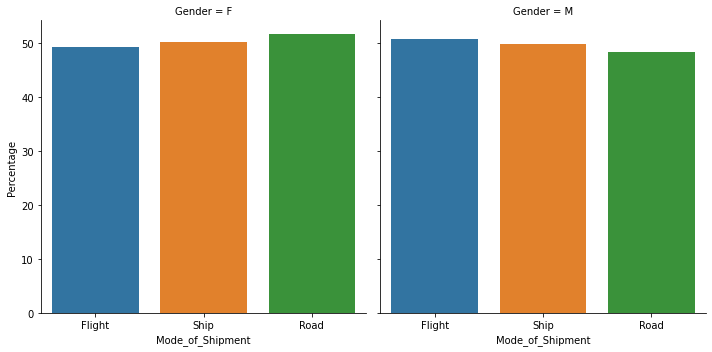

In [34]:
sns.catplot('Mode_of_Shipment', 'Percentage', col='Gender', data = merged, kind ='bar');

In [1]:
def print_alpha_nums(abc_list, num_list):
    for char in abc_list:
        for num in num_list:
            print(char, num)
    return

print_alpha_nums(['a', 'b', 'c'], [1, 2, 3]) 

a 1
a 2
a 3
b 1
b 2
b 3
c 1
c 2
c 3
